In [1]:
#Importando biblioteca necessárias
import matplotlib.pyplot as plt
import numpy as np
import skimage.data

In [33]:
# Lendo uma imagem padrão da biblioteca Scikit-image 
camera = skimage.data.camera().astype(int)

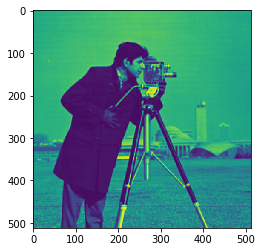

In [34]:
#Plotando a imagem
plt.imshow(camera);

In [35]:
# A imagem original possui 512x512 pixels
camera.shape

(512, 512)

In [36]:
# Ampliando imagem na horizontal
camera = np.concatenate((np.zeros(shape=(1, camera.shape[0]), dtype=int),
                         camera,
                         np.zeros(shape=(1, camera.shape[0]), dtype=int)), axis=0)

In [37]:
# Ampliando imagem na Vertical
camera = np.concatenate((np.zeros(shape=(1, camera.shape[0]), dtype=int).T,
                         camera,
                         np.zeros(shape=(1, camera.shape[0]), dtype=int).T), axis=1)

In [38]:
# A imagem ampliada possui 514x514 pixels
camera.shape

(514, 514)

In [39]:
# Aqui mostro como ficou a imagem modificada, imprimo uma submatriz 3x3 da imagem modificada
camera[-3:,-3:]

array([[113, 111,   0],
       [113, 111,   0],
       [  0,   0,   0]])

In [53]:
# Função que aplica máscara de derivada (abordagem central) em uma imagem
def mascara_derivada_dx(imagem, opcao):
    # Função recebe uma imagem e aplica uma máscara de derivada (abordagem central) e retorna a imagem nova
    
    # obetendo a quantidade de pixels da imagem
    n, m = imagem.shape
    
    # Criando uma imagem nova
    imagem_nova = np.zeros(shape=imagem.shape)
    
    for i in range(1, n-1):
        for j in range(1, m-1):
            if opcao == 1:
                imagem_nova[i, j] = imagem[i+1, j] - imagem[i-1, j]
            elif opcao == 2:
                imagem_nova[i, j] = imagem[i, j+1] - imagem[i, j-1]
            elif opcao == 3:
                imagem_nova[i, j] = (imagem[i-1, j] + imagem[i+1, j] + imagem[i, j-1] + imagem[i, j-1])/4
            elif opcao == 4:
                imagem_nova[i, j] = (imagem[i-1, j+1] + imagem[i, j+1]*2 + imagem[i+1, j+1] + imagem[i-1, j]*2 + 
                                     imagem[i, j]*4 +   imagem[i+1, j]*2 + imagem[i-1, j-1] + imagem[i, j-1]*2 + 
                                     imagem[i+1, j-1])/16
                
    
    return imagem_nova

In [95]:
imagem_nova = mascara_derivada_dx(camera, 1)

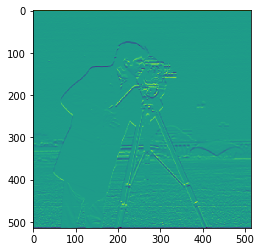

In [96]:
#Plotando a imagem
plt.imshow(imagem_nova);

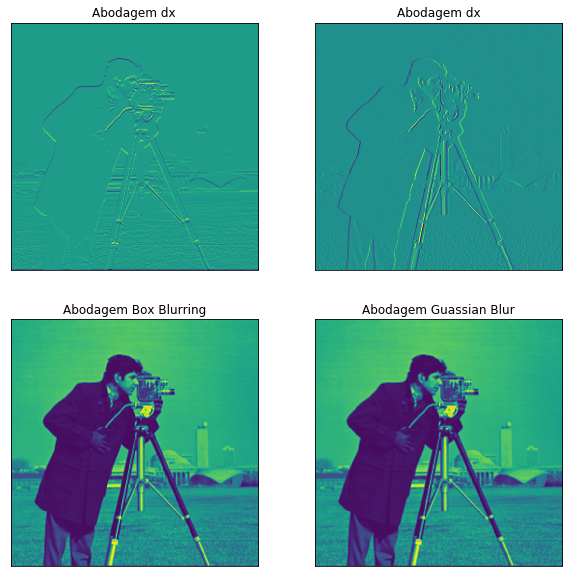

In [94]:
plt.gcf().set_size_inches(10, 10)
plt.subplot(221, title='Abodagem dx', xticks=[], yticks=[])
plt.imshow(mascara_derivada_dx(camera, 1))

plt.subplot(222, title='Abodagem dx', xticks=[], yticks=[])
plt.imshow(mascara_derivada_dx(camera, 2))

plt.subplot(223, title='Abodagem Box Blurring', xticks=[], yticks=[])
plt.imshow(mascara_derivada_dx(camera, 3))

plt.subplot(224, title='Abodagem Guassian Blur', xticks=[], yticks=[])
plt.imshow(mascara_derivada_dx(camera, 4));